# Example for using climate models - Application submitted to Nature "Cleaner Flight"


## Load and models

In [1]:
%matplotlib widget
import time
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from aeromaps.core.process import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_energy_with_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_climate_gwpstar,
    models_climate_fair,
    models_sustainability,
    models_sustainability_without_equivalent_emissions,
)
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
models_simple_gwpstar = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
}

models_gwpstar = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_gwpstar": models_climate_gwpstar,
    "models_sustainability": models_sustainability,
}

models_fair = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_fair": models_climate_fair,
    "models_sustainability_without_equivalent_emissions": models_sustainability_without_equivalent_emissions,
}

## 1. Validation of climate models

### 1.1. Comparison on historical data

#### GWP* - Fixed calibration of 20 years from Lee et al.

In [3]:
# Create process
process_validation_historical_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

process_validation_historical_gwpstar20yr.compute()

#### GWP* - Methane calibration and 1 year for the rest

In [4]:
# Create process
process_validation_historical_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Climate models
process_validation_historical_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1.0
)
process_validation_historical_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_historical_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_historical_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar1yr.parameters.soot_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.sulfur_gwpstar_s_coefficient = 0.0

process_validation_historical_gwpstar1yr.compute()

#### GWP* - Methane calibration and 6 year for the rest

In [5]:
# Create process
process_validation_historical_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Climate models
duration = 6
process_validation_historical_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_historical_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_historical_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_historical_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar6yr.parameters.soot_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.sulfur_gwpstar_s_coefficient = 0.0

t1 = time.time()
process_validation_historical_gwpstar6yr.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

Computation time: 1.9 s


#### FaIR - Adapted calibration for CO<sub>2</sub>

In [6]:
# Create process
process_validation_historical_fair = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

t1 = time.time()
process_validation_historical_fair.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Computation time: 2.8 s


#### Results

In [7]:
# Reference results
reference_temperature_data_df = read_csv(
    "data_climate/reference_temperature_change_historic.csv", delimiter=";"
)
reference_temperature_data = reference_temperature_data_df.values
data_years = reference_temperature_data[:, 0]
data_temperature_grewe_curtech = reference_temperature_data[:, 1]
data_temperature_grewe_ecats = reference_temperature_data[:, 2]
data_temperature_klower = reference_temperature_data[:, 3]
data_temperature_klower_co2 = reference_temperature_data[:, 4]

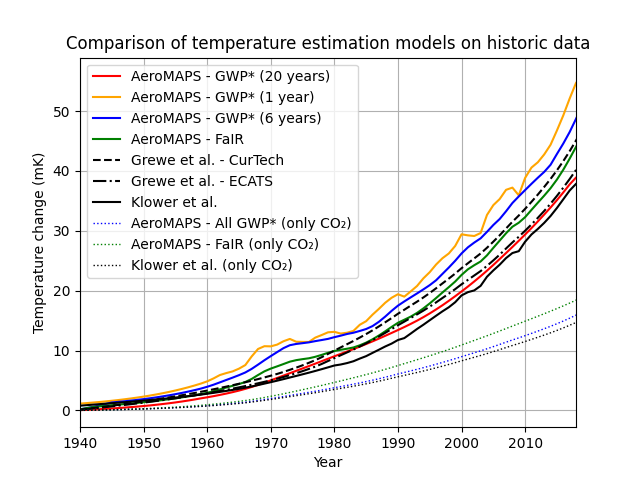

In [8]:
fig, ax = plt.subplots()
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="red",
    label="AeroMAPS - GWP* (20 years)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="orange",
    label="AeroMAPS - GWP* (1 year)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="blue",
    label="AeroMAPS - GWP* (6 years)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="green",
    label="AeroMAPS - FaIR",
    linestyle="-",
)
ax.plot(
    data_years,
    data_temperature_grewe_curtech,
    color="black",
    label="Grewe et al. - CurTech",
    linestyle="--",
)
ax.plot(
    data_years,
    data_temperature_grewe_ecats,
    color="black",
    label="Grewe et al. - ECATS",
    linestyle="-.",
)
ax.plot(data_years, data_temperature_klower, color="black", label="Klower et al.", linestyle="-")
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="blue",
    label="AeroMAPS - All GWP* (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="green",
    label="AeroMAPS - FaIR (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    data_temperature_klower_co2,
    color="black",
    label="Klower et al. (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of temperature estimation models on historic data",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

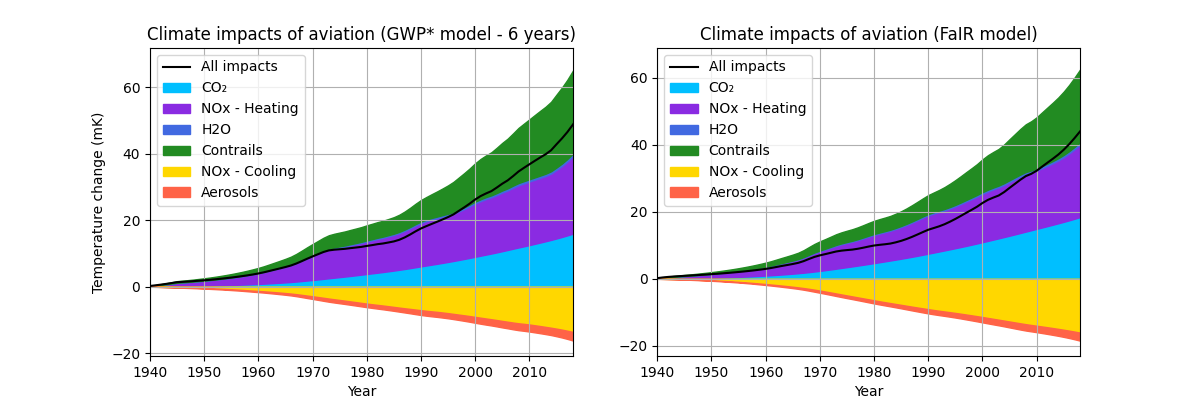

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="black",
    label="All impacts",
    linestyle="-",
)
axs[0].fill_between(
    data_years,
    np.zeros(80),
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="deepskyblue",
    label="CO₂",
)
axs[0].fill_between(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    color="blueviolet",
    label="NOx - Heating",
)
axs[0].fill_between(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    color="royalblue",
    label="H2O",
)
axs[0].fill_between(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ][0:80],
    color="forestgreen",
    label="Contrails",
)
axs[0].fill_between(
    data_years,
    np.zeros(80),
    1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    color="gold",
    label="NOx - Cooling",
)
axs[0].fill_between(
    data_years,
    1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    )
    + 1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][0:80]
    ),
    color="tomato",
    label="Aerosols",
)
axs[0].set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Climate impacts of aviation (GWP* model - 6 years)",
)
axs[0].legend()

axs[1].plot(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="black",
    label="All impacts",
    linestyle="-",
)
axs[1].fill_between(
    data_years,
    np.zeros(80),
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="deepskyblue",
    label="CO₂",
)
axs[1].fill_between(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    color="blueviolet",
    label="NOx - Heating",
)
axs[1].fill_between(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    color="royalblue",
    label="H2O",
)
axs[1].fill_between(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ][0:80],
    color="forestgreen",
    label="Contrails",
)
axs[1].fill_between(
    data_years,
    np.zeros(80),
    1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    color="gold",
    label="NOx - Cooling",
)
axs[1].fill_between(
    data_years,
    1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    )
    + 1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][0:80]
    ),
    color="tomato",
    label="Aerosols",
)
axs[1].set(
    xlabel="Year",
    title="Climate impacts of aviation (FaIR model)",
)

axs[0].grid()
axs[1].grid()
axs[0].set_xlim(1940, 2018)
axs[1].set_xlim(1940, 2018)

plt.legend()
plt.show()

### 1.2. Comparison on prospective data

In [10]:
# GWP* - 20 years
process_validation_prospective_backtonormal_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_prospective_backtonormal_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = (
    1
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.soot_gwpstar_variation_duration = (
    1
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = 1
process_validation_prospective_backtonormal_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = (
    1
)
process_validation_prospective_backtonormal_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_prospective_backtonormal_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.soot_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.compute()

# FaIR
process_validation_prospective_backtonormal_fair = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [11]:
# GWP* - 20 years
process_validation_prospective_zerogrowth_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_prospective_zerogrowth_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = (
    1
)
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1
)
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.soot_gwpstar_variation_duration = 1
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = 1
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = (
    1
)
process_validation_prospective_zerogrowth_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_prospective_zerogrowth_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.soot_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.compute()

# FaIR
process_validation_prospective_zerogrowth_fair = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [12]:
# GWP* - 20 years
process_validation_prospective_longtermdecline_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_prospective_longtermdecline_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = (
    1
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.soot_gwpstar_variation_duration = (
    1
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = (
    1
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = (
    1
)
process_validation_prospective_longtermdecline_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_prospective_longtermdecline_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.soot_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.compute()

# FaIR
process_validation_prospective_longtermdecline_fair = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

#### Results

In [13]:
# Reference results
reference_temperature_prospective_data_df = read_csv(
    "data_climate/reference_temperature_change_prospective.csv", delimiter=";"
)
reference_temperature_prospective_data = reference_temperature_prospective_data_df.values
data_years_prospective = reference_temperature_prospective_data[:, 0]
data_temperature_3 = reference_temperature_prospective_data[:, 1]
data_temperature_0 = reference_temperature_prospective_data[:, 3]
data_temperature_m25 = reference_temperature_prospective_data[:, 5]

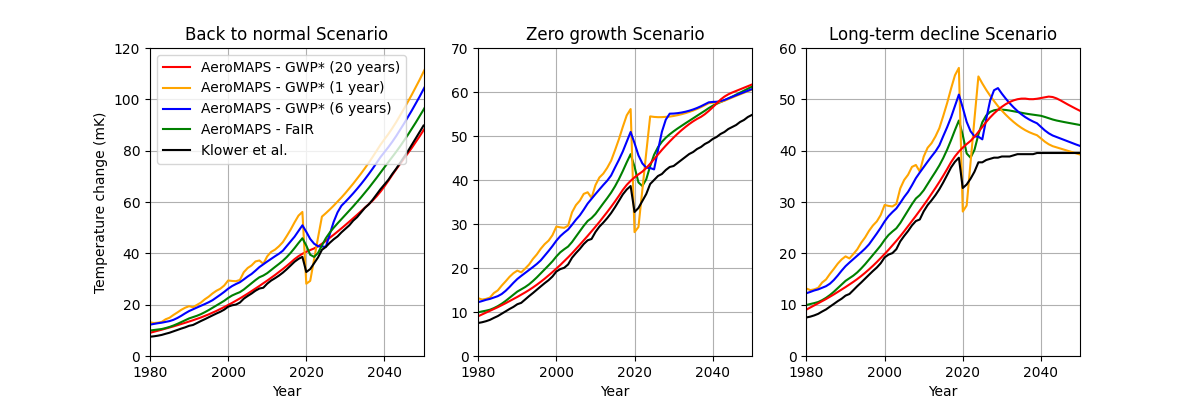

In [14]:
data_years_total = list(range(1940, 2101))

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    label="AeroMAPS - GWP* (20 years)",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    label="AeroMAPS - GWP* (1 year)",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    label="AeroMAPS - GWP* (6 years)",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    label="AeroMAPS - FaIR",
    linestyle="-",
)
axs[0].plot(
    data_years_prospective,
    data_temperature_3,
    color="black",
    label="Klower et al.",
    linestyle="-",
)
axs[0].legend()
axs[0].set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Back to normal Scenario",
)

axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    linestyle="-",
)
axs[1].plot(
    data_years_prospective,
    data_temperature_0,
    color="black",
    linestyle="-",
)
axs[1].set(
    xlabel="Year",
    title="Zero growth Scenario",
)

axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    linestyle="-",
)
axs[2].plot(
    data_years_prospective,
    data_temperature_m25,
    color="black",
    linestyle="-",
)
axs[2].set(
    xlabel="Year",
    title="Long-term decline Scenario",
)

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim(1980, 2050)
axs[0].set_ylim(0, 120)
axs[1].set_xlim(1980, 2050)
axs[1].set_ylim(0, 70)
axs[2].set_xlim(1980, 2050)
axs[2].set_ylim(0, 60)

plt.show()

### 1.3. Comparison on a sudden halt scenario

In [15]:
# GWP* - 20 years
process_validation_suddenhalt_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_suddenhalt_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = 1
process_validation_suddenhalt_gwpstar1yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_suddenhalt_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar1yr.parameters.soot_gwpstar_variation_duration = 1
process_validation_suddenhalt_gwpstar1yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = 1
process_validation_suddenhalt_gwpstar1yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = 1
process_validation_suddenhalt_gwpstar1yr.parameters.sulfur_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_suddenhalt_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_suddenhalt_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar6yr.parameters.soot_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.sulfur_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.compute()

# FaIR
process_validation_suddenhalt_fair = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

#### Results

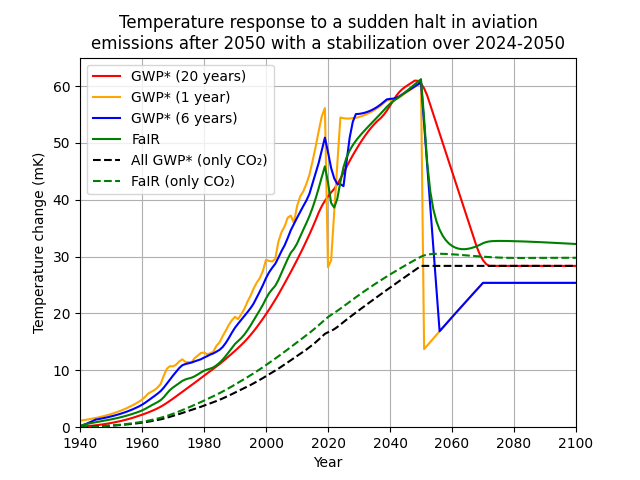

In [16]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    label="GWP* (20 years)",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    label="GWP* (1 year)",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    label="GWP* (6 years)",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    label="FaIR",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="black",
    label="All GWP* (only CO₂)",
    linestyle="--",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="green",
    label="FaIR (only CO₂)",
    linestyle="--",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Temperature response to a sudden halt in aviation\nemissions after 2050 with a stabilization over 2024-2050",
)

ax.grid()
plt.xlim(1940, 2100)
plt.ylim(0, 65)
plt.legend()
plt.show()

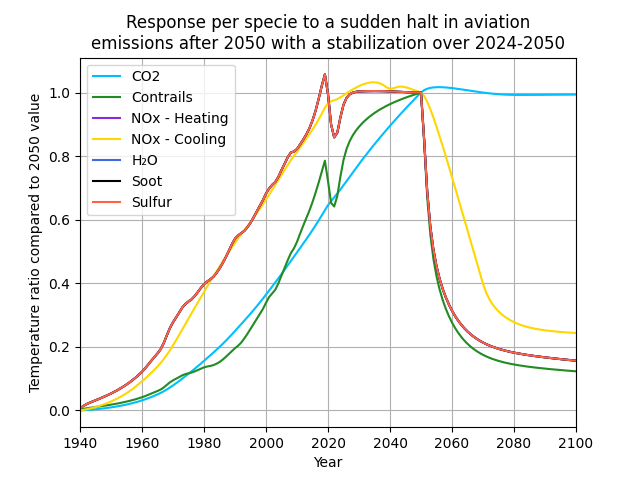

In [17]:
fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ]/process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2050],
    color="deepskyblue",
    label="CO2",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ]/process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ][2050],
    color="forestgreen",
    label="Contrails",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ]/process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][2050],
    color="blueviolet",
    label="NOx - Heating",
    linestyle="-",
)
ax.plot(
    data_years_total,
    (process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
    ]+process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_ch4_decrease_from_aviation"
    ]+process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
    ])/(process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
    ][2050]+process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_ch4_decrease_from_aviation"
    ][2050]+process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
    ][2050]),
    color="gold",
    label="NOx - Cooling",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ]/process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][2050],
    color="royalblue",
    label="H₂O",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_soot_from_aviation"
    ]/process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_soot_from_aviation"
    ][2050],
    color="black",
    label="Soot",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_sulfur_from_aviation"
    ]/process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_sulfur_from_aviation"
    ][2050],
    color="tomato",
    label="Sulfur",
    linestyle="-",
)


ax.set(
    xlabel="Year",
    ylabel="Temperature ratio compared to 2050 value",
    title="Response per specie to a sudden halt in aviation\nemissions after 2050 with a stabilization over 2024-2050",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()

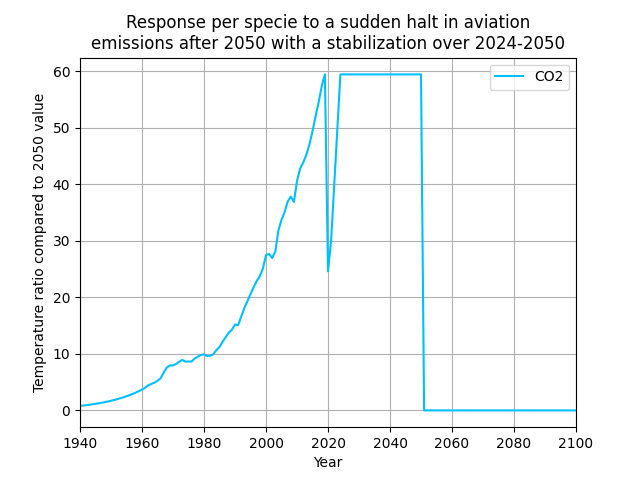

In [18]:
fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"]["contrails_erf"],
    color="deepskyblue",
    label="CO2",
    linestyle="-",
)
ax.set(
    xlabel="Year",
    ylabel="Temperature ratio compared to 2050 value",
    title="Response per specie to a sudden halt in aviation\nemissions after 2050 with a stabilization over 2024-2050",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()

## 2. Applications

### 2.1. Mitigation scenarios

In [19]:
growth = 3

In [20]:
# FaIR
process_application_illustrative_fair = create_process(
    configuration_file="data_climate/config_application_illustrative.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_illustrative_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [21]:
# GWP* - 6 years
process_application_trend_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_trend.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_trend_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_trend_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_trend_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_trend_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_trend_gwpstar6yr.compute()

# FaIR
process_application_trend_fair = create_process(
    configuration_file="data_climate/config_application_trend.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_trend_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_trend_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_trend_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_trend_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_trend_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [22]:
# GWP* - 6 years
process_application_lcfuel_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_gwpstar6yr.compute()

# FaIR
process_application_lcfuel_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_fair.compute()

# Sensitivity to contrails - Low
process_application_lcfuel_lowcontrails_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_lowcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 17 / 57.4
)
process_application_lcfuel_lowcontrails_fair.compute()

# Sensitivity to contrails - High
process_application_lcfuel_highcontrails_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_highcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 98 / 57.4
)
process_application_lcfuel_highcontrails_fair.compute()

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the v

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [23]:
# GWP* - 6 years
process_application_operations_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.compute()

# FaIR
process_application_operations_fair = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_operations_fair.compute()

# Sensitivity to contrails - Low
process_application_operations_lowcontrails_fair = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_lowcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 17 / 57.4
)
process_application_operations_lowcontrails_fair.compute()

# Sensitivity to contrails - High
process_application_operations_highcontrails_fair = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_highcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 98 / 57.4
)
process_application_operations_highcontrails_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [24]:
# GWP* - 6 years
process_application_lcfuel_operations_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_lcfuel_operations.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.compute()

# FaIR
process_application_lcfuel_operations_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_operations_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.compute()

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the v

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

#### Results

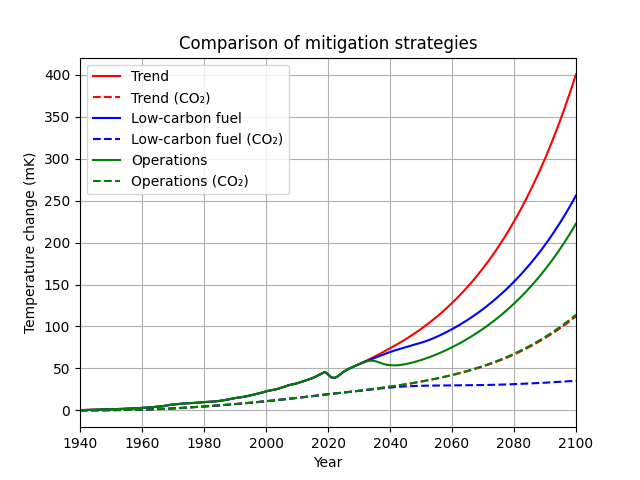

In [25]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots()

ax.plot(
    data_years_total,
    1000
    * process_application_trend_fair.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="red",
    label="Trend",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="red",
    label="Trend (CO₂)",
    linestyle="--",
)

ax.plot(
    data_years_total,
    1000
    * process_application_lcfuel_fair.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="blue",
    label="Low-carbon fuel",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="blue",
    label="Low-carbon fuel (CO₂)",
    linestyle="--",
)

ax.plot(
    data_years_total,
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    label="Operations",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="green",
    label="Operations (CO₂)",
    linestyle="--",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of mitigation strategies",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()

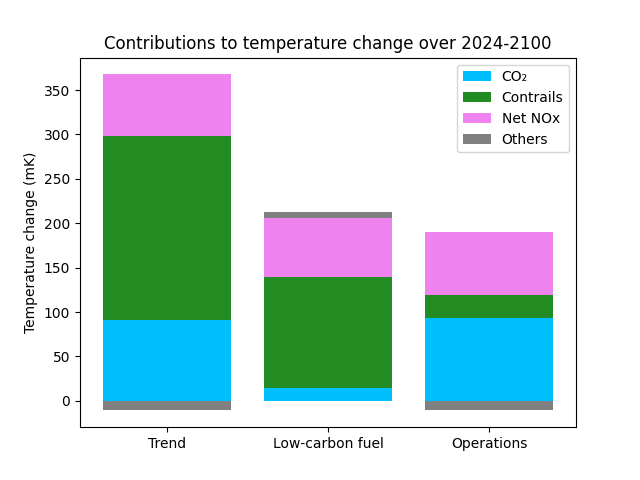

In [26]:
fig, ax = plt.subplots()
barWidth = 0.85
legend = ["Trend", "Low-carbon fuel", "Operations"]
ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="deepskyblue",
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="deepskyblue",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="deepskyblue",
    label="CO₂",
)

ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="forestgreen",
    label="Contrails"
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="forestgreen",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="forestgreen",
)

ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    color="violet",
    label="Net NOx",
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    color="violet",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    color="violet",
)

ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    color="grey",
    label="Others",
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][2024]
    )
    - 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    - 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    - 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    color="grey",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    color="grey",
)

ax.set(
    ylabel="Temperature change (mK)",
    title="Contributions to temperature change over 2024-2100",
)

plt.legend()

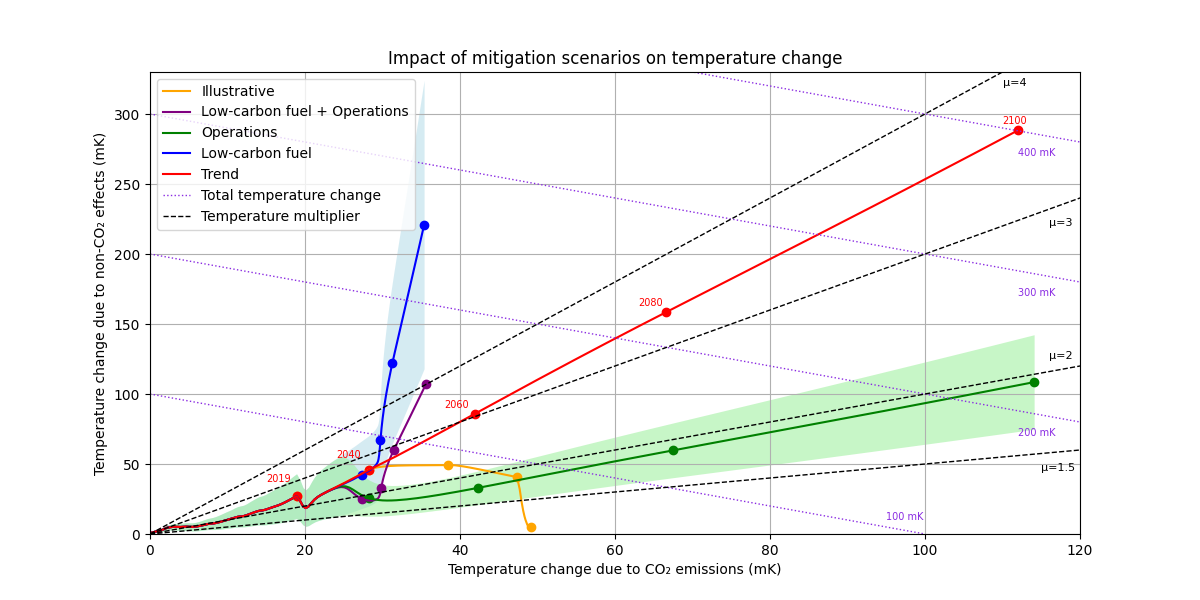

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.fill_between(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_lowcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_highcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="lightblue",
    alpha=0.5,
    linewidth=0,
)

ax.fill_between(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_operations_lowcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    1000
    * process_application_operations_highcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="lightgreen",
    alpha=0.5,
    linewidth=0,
)


ax.plot(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="orange",
    label="Illustrative",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2019],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2019],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="orange",
)

ax.plot(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="purple",
    label="Low-carbon fuel + Operations",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="purple",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="purple",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="purple",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="purple",
)

ax.plot(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="green",
    label="Operations",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="green",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="green",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="green",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="green",
)

ax.plot(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="blue",
    label="Low-carbon fuel",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="blue",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="blue",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="blue",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="blue",
)

ax.plot(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="red",
    label="Trend",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2019],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2019],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="red",
)

ax.plot(
    [0, 100],
    [100, 0],
    color="blueviolet",
    linestyle=":",
    linewidth=1,
    label="Total temperature change",
)
plt.text(95, 10, "100 mK", fontsize=7, color="blueviolet")
ax.plot([0, 200], [200, 0], color="blueviolet", linestyle=":", linewidth=1)
plt.text(112, 70, "200 mK", fontsize=7, color="blueviolet")
ax.plot([0, 300], [300, 0], color="blueviolet", linestyle=":", linewidth=1)
plt.text(112, 170, "300 mK", fontsize=7, color="blueviolet")
ax.plot([0, 400], [400, 0], color="blueviolet", linestyle=":", linewidth=1)
plt.text(112, 270, "400 mK", fontsize=7, color="blueviolet")

ax.plot(
    [0, 150],
    [0, 150 / 2],
    color="black",
    linestyle="--",
    linewidth=1,
    label="Temperature multiplier",
)
plt.text(115, 45, "μ=1.5", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0, 150],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(116, 125, "μ=2", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0, 150 * 2],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(116, 220, "μ=3", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0, 150 * 3],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(110, 320, "μ=4", fontsize=8, color="black")

plt.text(15, 37, "2019", fontsize=7, color="red")
plt.text(24, 54, "2040", fontsize=7, color="red")
plt.text(38, 90, "2060", fontsize=7, color="red")
plt.text(63, 163, "2080", fontsize=7, color="red")
plt.text(110, 293, "2100", fontsize=7, color="red")

ax.set(
    xlabel="Temperature change due to CO₂ emissions (mK)",
    ylabel="Temperature change due to non-CO₂ effects (mK)",
    title="Impact of mitigation scenarios on temperature change",
)

ax.grid()
plt.xlim(0, 120)
plt.ylim(0, 330)

plt.legend()
plt.show()

### 2.2. Climate metrics

In [28]:
def metric_equivalent_emissions(
    metrics, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions
):
    metric_contrails = metrics[0]
    contrails_metric_equivalent_emissions = metric_contrails * contrails_kilometers
    metric_nox = metrics[1]
    nox_metric_equivalent_emissions = metric_nox * nox_emissions
    metric_h2o = metrics[2]
    h2o_metric_equivalent_emissions = metric_h2o * h2o_emissions
    metric_soot = metrics[3]
    soot_metric_equivalent_emissions = metric_soot * soot_emissions
    metric_sulfur = metrics[4]
    sulfur_metric_equivalent_emissions = metric_sulfur * sulfur_emissions
    non_co2_metric_equivalent_emissions = (
        contrails_metric_equivalent_emissions
        + nox_metric_equivalent_emissions
        + h2o_metric_equivalent_emissions
        + soot_metric_equivalent_emissions
        + sulfur_metric_equivalent_emissions
    )
    return non_co2_metric_equivalent_emissions


def metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions):
    return (co2_emissions + non_co2_metric_equivalent_emissions) / co2_emissions


metrics_gwp20 = [39, 619 * 14 / 46, 0.22, 4288, -832]
metrics_gwp50 = [18, 205 * 14 / 46, 0.10, 2018, -392]
metrics_gwp100 = [11, 114 * 14 / 46, 0.06, 1166, -226]
metrics_gtp20 = [11, -222 * 14 / 46, 0.07, 1245, -241]
metrics_gtp50 = [1.8, -69 * 14 / 46, 0.01, 195, -38]
metrics_gtp100 = [1.5, 13 * 14 / 46, 0.008, 161, -31]

In [29]:
co2_emissions = process_application_trend_fair.data["climate_outputs"]["co2_emissions"]
nox_emissions = process_application_trend_fair.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process_application_trend_fair.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process_application_trend_fair.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process_application_trend_fair.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = (
    process_application_trend_fair.data["climate_outputs"]["total_aircraft_distance"] / 10**9
)
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = (
        process_application_trend_fair.data["climate_outputs"]["total_aircraft_distance"][k]
        / 10**9
        * (
            1
            - process_application_trend_fair.data["vector_outputs"]["operations_contrails_gain"][k]
            / 100
        )
        * process_application_trend_fair.data["vector_outputs"]["fuel_effect_correction_contrails"][
            k
        ]
    )

gwp20_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp50_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp100_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp20_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp50_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp100_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)

In [30]:
co2_emissions = process_application_lcfuel_fair.data["climate_outputs"]["co2_emissions"]
nox_emissions = process_application_lcfuel_fair.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process_application_lcfuel_fair.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process_application_lcfuel_fair.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process_application_lcfuel_fair.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = (
    process_application_lcfuel_fair.data["climate_outputs"]["total_aircraft_distance"] / 10**9
)
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = (
        process_application_lcfuel_fair.data["climate_outputs"]["total_aircraft_distance"][k]
        / 10**9
        * (
            1
            - process_application_operations_fair.data["vector_outputs"][
                "operations_contrails_gain"
            ][k]
            / 100
        )
        * process_application_operations_fair.data["vector_outputs"][
            "fuel_effect_correction_contrails"
        ][k]
    )

gwp20_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp50_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp100_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp20_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp50_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp100_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)

In [31]:
co2_emissions = process_application_operations_fair.data["climate_outputs"]["co2_emissions"]
nox_emissions = process_application_operations_fair.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process_application_operations_fair.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process_application_operations_fair.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process_application_operations_fair.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = (
    process_application_operations_fair.data["climate_outputs"]["total_aircraft_distance"] / 10**9
)
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = (
        process_application_operations_fair.data["climate_outputs"]["total_aircraft_distance"][k]
        / 10**9
        * (
            1
            - process_application_operations_fair.data["vector_outputs"][
                "operations_contrails_gain"
            ][k]
            / 100
        )
        * process_application_operations_fair.data["vector_outputs"][
            "fuel_effect_correction_contrails"
        ][k]
    )

gwp20_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp50_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp100_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp20_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp50_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp100_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)

In [32]:
annual_fair_coefficient_trend = np.zeros(2101 - 1941)
annual_fair_coefficient_lcfuel = np.zeros(2101 - 1941)
annual_fair_coefficient_operations = np.zeros(2101 - 1941)
for k in range(1941, 2101):
    annual_fair_coefficient_trend[k - 1941] = (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k - 1]
    ) / (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k - 1]
    )
    annual_fair_coefficient_lcfuel[k - 1941] = (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k - 1]
    ) / (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k - 1]
    )
    annual_fair_coefficient_operations[k - 1941] = (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k - 1]
    ) / (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k - 1]
    )

#### Results

In [33]:
def sliding_average(values, duration):
    initial_index = (duration-1) // 2
    average_values = [sum(values[i-initial_index:i+initial_index+1]/duration) for i in range(initial_index, len(values)-initial_index)]
    return average_values

gwpstar_multiplicative_coefficient = (process_application_trend_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"] / process_application_trend_gwpstar6yr.data["climate_outputs"]["co2_emissions"]).values

average_gwpstar_multiplicative_coefficient = sliding_average(gwpstar_multiplicative_coefficient, 10)
average_annual_fair_coefficient_trend = sliding_average(annual_fair_coefficient_trend, 10)

growth_traffic = np.zeros(2019-1940)
for k in range(1941, 2019+1):
    growth_traffic[k-1941] = (process_application_trend_gwpstar6yr.data["climate_outputs"]["total_aircraft_distance"][k]/process_application_trend_gwpstar6yr.data["climate_outputs"]["total_aircraft_distance"][k-1]-1)*100

average_growth_traffic = sliding_average(growth_traffic, 10)

[]

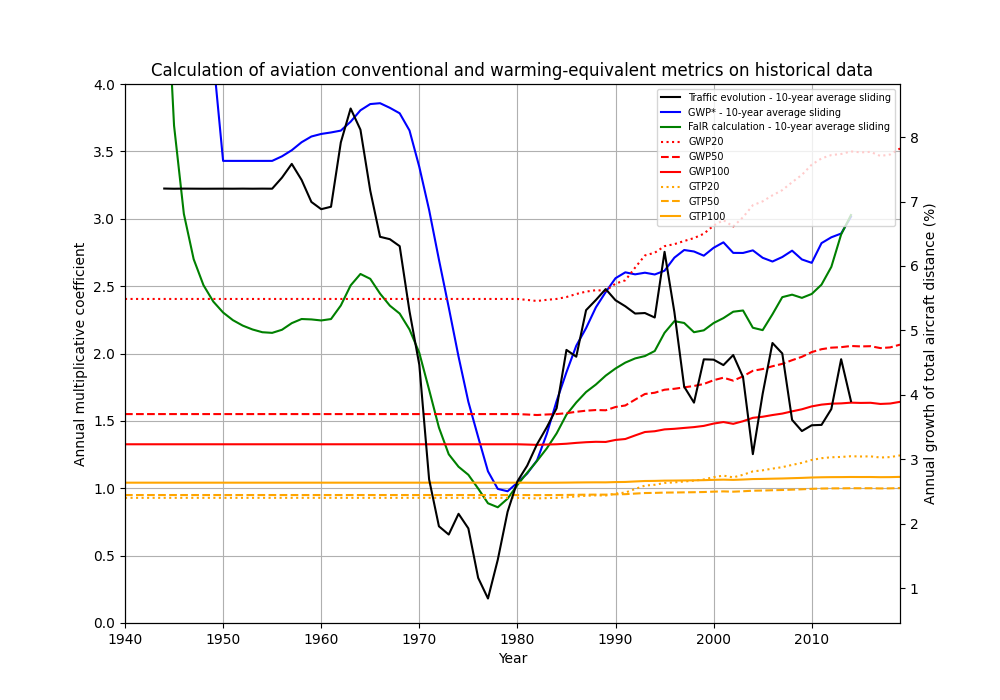

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(
    data_years_total[4:75],
    average_gwpstar_multiplicative_coefficient[0:71],
    color="blue",
    label="GWP* - 10-year average sliding",
    linestyle="-",
)
ax.plot(
    data_years_total[4:75],
    average_annual_fair_coefficient_trend[0:71],
    color="green",
    label="FaIR calculation - 10-year average sliding",
    linestyle="-",
)

ax.plot(
    data_years,
    gwp20_multiplicative_coefficient_trend[0:80],
    color="red",
    label="GWP20",
    linestyle=":",
)
ax.plot(
    data_years,
    gwp50_multiplicative_coefficient_trend[0:80],
    color="red",
    label="GWP50",
    linestyle="--",
)
ax.plot(
    data_years,
    gwp100_multiplicative_coefficient_trend[0:80],
    color="red",
    label="GWP100",
    linestyle="-",
)
ax.plot(
    data_years,
    gtp20_multiplicative_coefficient_trend[0:80],
    color="orange",
    label="GTP20",
    linestyle=":",
)
ax.plot(
    data_years,
    gtp50_multiplicative_coefficient_trend[0:80],
    color="orange",
    label="GTP50",
    linestyle="--",
)
ax.plot(
    data_years,
    gtp100_multiplicative_coefficient_trend[0:80],
    color="orange",
    label="GTP100",
    linestyle="-",
)

ax.set(xlabel="Year", ylabel="Annual multiplicative coefficient", title="Calculation of aviation conventional and warming-equivalent metrics on historical data")
ax.set_xlim(1940,2019)
ax.set_ylim(0,4)

axgrowth = ax.twinx()
axgrowth.plot(
    data_years_total[4:75],
    average_growth_traffic,
    color="black",
    label="Traffic evolution - 10-year average sliding",
    linestyle="-",
)
axgrowth.set(ylabel="Annual growth of total aircraft distance (%)")

lines, labels = ax.get_legend_handles_labels()
linesgrowth, labelsgrowth = axgrowth.get_legend_handles_labels()
axgrowth.legend(linesgrowth + lines, labelsgrowth + labels, loc=0, fontsize=7)

ax.grid()
plt.plot()

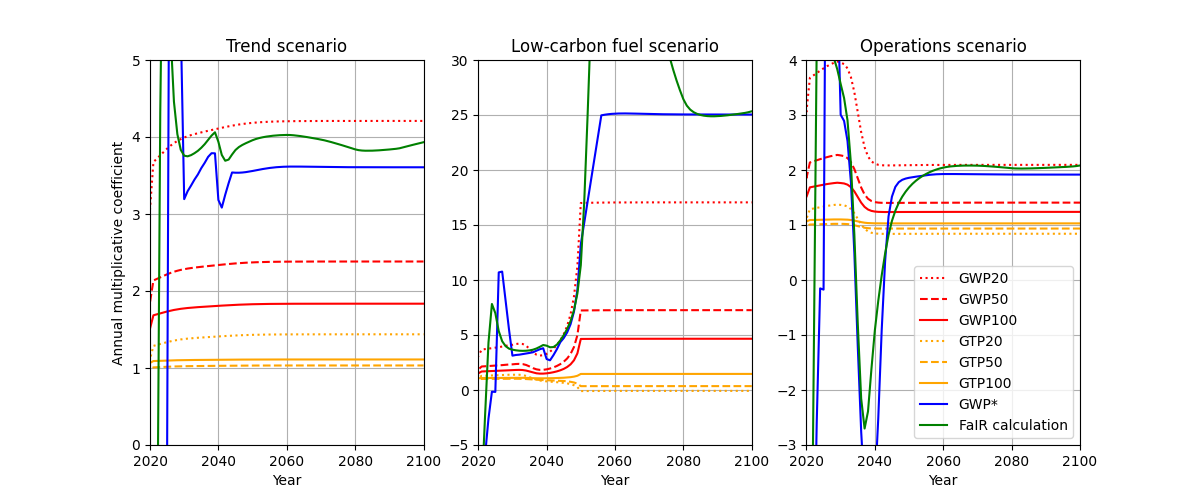

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].plot(
    data_years_total,
    gwp20_multiplicative_coefficient_trend,
    color="red",
    label="GWP20",
    linestyle=":",
)
axs[0].plot(
    data_years_total,
    gwp50_multiplicative_coefficient_trend,
    color="red",
    label="GWP50",
    linestyle="--",
)
axs[0].plot(
    data_years_total,
    gwp100_multiplicative_coefficient_trend,
    color="red",
    label="GWP100",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    gtp20_multiplicative_coefficient_trend,
    color="orange",
    label="GTP20",
    linestyle=":",
)
axs[0].plot(
    data_years_total,
    gtp50_multiplicative_coefficient_trend,
    color="orange",
    label="GTP50",
    linestyle="--",
)
axs[0].plot(
    data_years_total,
    gtp100_multiplicative_coefficient_trend,
    color="orange",
    label="GTP100",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    process_application_trend_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"]/ process_application_trend_gwpstar6yr.data["climate_outputs"]["co2_emissions"],
    color="blue",
    label="GWP*",
    linestyle="-",
)
axs[0].plot(
    data_years_total[1 : 2101 - 1941 + 1],
    annual_fair_coefficient_trend,
    color="green",
    label="FaIR calculation",
    linestyle="-",
)
axs[0].set(xlabel="Year", ylabel="Annual multiplicative coefficient", title="Trend scenario")
#axs[0].legend()

axs[1].plot(
    data_years_total,
    gwp20_multiplicative_coefficient_lcfuel,
    color="red",
    linestyle=":",
)
axs[1].plot(
    data_years_total,
    gwp50_multiplicative_coefficient_lcfuel,
    color="red",
    linestyle="--",
)
axs[1].plot(
    data_years_total,
    gwp100_multiplicative_coefficient_lcfuel,
    color="red",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    gtp20_multiplicative_coefficient_lcfuel,
    color="orange",
    linestyle=":",
)
axs[1].plot(
    data_years_total,
    gtp50_multiplicative_coefficient_lcfuel,
    color="orange",
    linestyle="--",
)
axs[1].plot(
    data_years_total,
    gtp100_multiplicative_coefficient_lcfuel,
    color="orange",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    process_application_lcfuel_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"]
    / process_application_lcfuel_gwpstar6yr.data["climate_outputs"]["co2_emissions"],
    color="blue",
    linestyle="-",
)
axs[1].plot(
    data_years_total[1 : 2101 - 1941 + 1],
    annual_fair_coefficient_lcfuel,
    color="green",
    linestyle="-",
)
axs[1].set(xlabel="Year", title="Low-carbon fuel scenario")

axs[2].plot(
    data_years_total,
    gwp20_multiplicative_coefficient_operations,
    color="red",
    label="GWP20",
    linestyle=":",
)
axs[2].plot(
    data_years_total,
    gwp50_multiplicative_coefficient_operations,
    color="red",
    label="GWP50",
    linestyle="--",
)
axs[2].plot(
    data_years_total,
    gwp100_multiplicative_coefficient_operations,
    color="red",
    label="GWP100",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    gtp20_multiplicative_coefficient_operations,
    color="orange",
    label="GTP20",
    linestyle=":",
)
axs[2].plot(
    data_years_total,
    gtp50_multiplicative_coefficient_operations,
    color="orange",
    label="GTP50",
    linestyle="--",
)
axs[2].plot(
    data_years_total,
    gtp100_multiplicative_coefficient_operations,
    color="orange",
    label="GTP100",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    process_application_operations_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"]
    / process_application_operations_gwpstar6yr.data["climate_outputs"]["co2_emissions"],
    color="blue",
    label="GWP*",
    linestyle="-",
)
axs[2].plot(
    data_years_total[1 : 2101 - 1941 + 1],
    annual_fair_coefficient_operations,
    color="green",
    label="FaIR calculation",
    linestyle="-",
)
axs[2].set(xlabel="Year", title="Operations scenario")
axs[2].legend()

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim(2020, 2100)
axs[0].set_ylim(0, 5)
axs[1].set_xlim(2020, 2100)
axs[1].set_ylim(-5, 30)
axs[2].set_xlim(2020, 2100)
axs[2].set_ylim(-3, 4)

plt.show()